## anomali detection

In [30]:
import os
import shutil
import pathlib
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from keras.utils import image_dataset_from_directory
import pathlib
from tensorflow.keras.utils import image_dataset_from_directory

In [31]:
dataframe = pd.read_csv("ecg.csv")
raw_data = dataframe.values
dataframe.head()

,-0.11252183,-2.8272038,-3.7738969,-4.3497511,-4.376041,-3.4749863,-2.1814082,-1.8182865,-1.2505219,-0.47749208,...,0.79216787,0.93354122,0.79695779,0.57862066,0.2577399,0.22807718,0.12343082,0.92528624,0.19313742,1.0
0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
1,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
2,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
3,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0
4,-1.507674,-3.574550,-4.478011,-4.408275,-3.321242,-2.105171,-1.481048,-1.301362,-0.498240,-0.286928,...,1.089068,0.983369,1.014124,0.952629,0.749326,1.007076,1.634990,1.493365,-0.783134,1.0


In [32]:
labels = raw_data[:,-1]
data = raw_data[:,:-1]

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Splitting data as train and test
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 42)
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
X_train_normal = X_train[y_train == 1]
X_train_abnormal = X_train[y_train == 0]

X_test_normal = X_test[y_test == 1]
X_test_abnormal = X_test[y_test == 0]

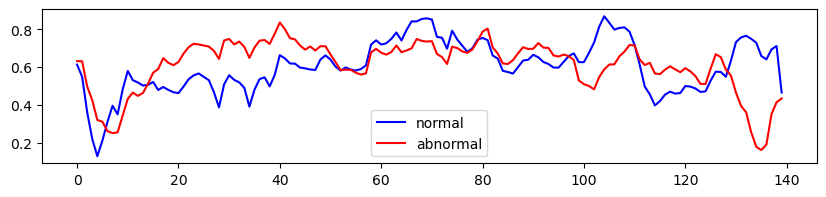

In [35]:
plt.figure(figsize = (10, 2))

plt.plot(X_train_normal[0], "-b", label = "normal")
plt.plot(X_test_abnormal[0], "-r", label = "abnormal")
plt.legend()


In [36]:
# create model
mdl = keras.Sequential()
mdl.add(layers.Dense(128,  activation = "relu", input_shape = (X_train.shape[1], )))
mdl.add(layers.Dense(64,  activation = "relu" ))
mdl.add(layers.Dense(32,  activation = "relu" ))
mdl.add(layers.Dense(64,  activation = "relu" ))
mdl.add(layers.Dense(128,  activation = "relu" ))
mdl.add(layers.Dense(X_train.shape[1],  activation = "sigmoid" ))

# Compiling model
mdl.compile(optimizer = "adam", loss = "mse")
mdl.fit(X_train_normal, X_train_normal, epochs = 10)

Epoch 1/10


C:\Users\Hefes\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0155
Epoch 2/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0043
Epoch 3/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0023
Epoch 4/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0019
Epoch 5/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0016
Epoch 6/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015
Epoch 7/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015
Epoch 8/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0014   
Epoch 9/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0012
Epoch 10/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011


In [37]:
Xpred = mdl.predict(X_train_normal)
Xpred.shape

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


(2328, 140)

In [38]:
from keras.metrics import mean_absolute_error

train_mae = mean_absolute_error(X_train_normal, Xpred).numpy()

Text(0, 0.5, 'number')

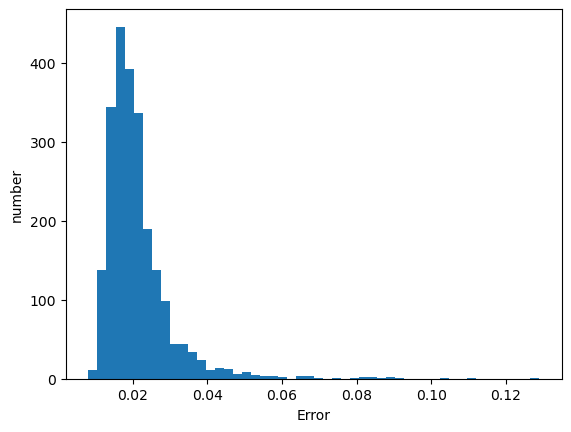

In [40]:
# Error distribution chart

plt.hist(train_mae, bins = 50)
plt.xlabel("Error")
plt.ylabel("number")

In [47]:
# making treshold
thr = train_mae.mean() + train_mae.std()
thr

0.030644681

In [57]:
Xpred_test = mdl.predict(X_test)

test_mae = mean_absolute_error(X_test, Xpred_test).numpy()

y_pred = np.zeros(test_mae.shape)
y_pred[test_mae < thr] = 1

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [64]:
print("classification report: \n ",classification_report(y_test, y_pred))

classification report: 
                precision    recall  f1-score   support

         0.0       0.88      1.00      0.93       410
         1.0       1.00      0.90      0.95       590

    accuracy                           0.94      1000
   macro avg       0.94      0.95      0.94      1000
weighted avg       0.95      0.94      0.94      1000

